# Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings(action='ignore')

# Reading Dataset

In [6]:
df = pd.read_csv('Spam.csv',encoding='ISO-8859-1')

# EDA (Exploratory Data Analysis)

In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [16]:
df.shape

(5572, 5)

In [17]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.isnull().sum()/len(df)*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [14]:
df['v1'].value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: v1, dtype: float64

<AxesSubplot:xlabel='v1', ylabel='count'>

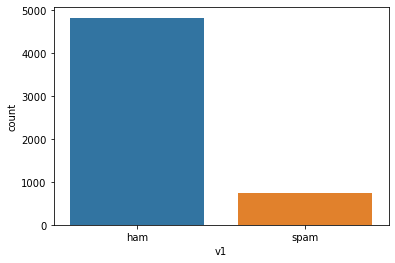

In [15]:
sns.countplot(df['v1'])

In [21]:
# Dropping unnecessary columns

In [27]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1,inplace=True)

In [28]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
df['v2'][159]

'You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810'

# NLP

* Steps in NLP:
    1. Remove puntuation
    2. Remove unwanted text.
    3. Remove stopwords
    4. Convert all text to lowercase
    5. tokenization
    6. Stemming/Lemminization
    7. word embedding (text -> number) (using countvectorizer/bow/tfidf/glove)

# Importing Libraries

In [44]:
import nltk
import re

In [48]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
print(sw.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
wd = WordNetLemmatizer()
corpus= []
for i in range(0,len(df)):
    v2 = re.sub('[^a-zA-Z]',' ',df['v2'][i])
    v2 = v2.lower()
    v2 = v2.split()
    v2 = [wd.lemmatize (word) for word in v2 if not word in sw.words('english')]
    v2 = ' '.join(v2)
    corpus.append(v2)

In [62]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [63]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [64]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
y = df['v1'].iloc[:].values

In [66]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 100, test_size=0.2)

# Model Building

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

# y_pred

In [72]:
y_pred = model_gnb.predict(x_test)

### Training Accuracy

In [74]:
model_gnb.score(x_train,y_train)

0.9315683194974198

In [75]:
model_gnb.score(x_test,y_test)

0.8771300448430494

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
cm = confusion_matrix(y_test,y_pred)

In [80]:
cm

array([[851, 119],
       [ 18, 127]], dtype=int64)

In [81]:
cr = classification_report(y_test,y_pred)

In [83]:
print(cr)

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93       970
        spam       0.52      0.88      0.65       145

    accuracy                           0.88      1115
   macro avg       0.75      0.88      0.79      1115
weighted avg       0.92      0.88      0.89      1115



In [84]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [85]:
y_pred = model_mnb.predict(x_test)

In [86]:
model_mnb.score(x_train,y_train)

0.9928202827013687

In [87]:
model_mnb.score(x_test,y_test)

0.9748878923766816

In [103]:
y_pred = model_mnb.predict(x_test)

In [112]:
y_pred = model_mnb.predict()

In [114]:
x[1:2]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
y_pred

array(['ham'], dtype='<U4')

In [93]:
cr = classification_report(y_test,y_pred)

In [95]:
print(cr)

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       970
        spam       0.88      0.94      0.91       145

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.97      0.98      1115



In [96]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[951,  19],
       [  9, 136]], dtype=int64)